In [3]:
"""
Template for week 3 project in Data Visualization

Read, clean, and plot financial time series from stock indices using matplotlib
"""

import csv
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"

# Financial data files
DJIA_34 = DATA_PATH + "DJIA_34.csv"
DJIA = DATA_PATH + "DJIA.csv"
NASDAQ_100 = DATA_PATH + "NASDAQ_100.csv"
NASDAQ = DATA_PATH + "NASDAQ.csv"
SP500 = DATA_PATH + "SP500.csv"


In [5]:
###################################################################
# Part 1 - Read, clean, and plot financial time series data 

def read_series(index_file):
    """
    Input: String index_file for CSV file containing stock index data
    
    Output: Time series as a list of tuples where each tuple is
    a pair of strings corresponding to a row in the CSV file
    """ 
    output_tuple_list = []
    
    with open(index_file, newline='') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            output_tuple_list.append(tuple(row))
            
    return output_tuple_list

In [6]:
def clean_series(raw_series):
    """
    Input: List raw_series whose entries are tuples (date, price)
    where dates corresponding to holidays have price "."
    
    Output: A list whose entries are tuples consisting of
    a date (string) and a price (float). Entries corresponding
    to the header and holidays have been removed.
    """
    # remove the header 
    output_cleaned_tuple_list = []
    
    for row in raw_series[1:]:
        # remove the weekday holidays
        if row[1] == ".":
            continue
        #convert price to float
        else:
            row = list(row)
            row[1] = float(row[1])
            output_cleaned_tuple_list.append(tuple(row))
    
    return output_cleaned_tuple_list

In [7]:
def plot_prices(index_file):
    """
    Input: String index_file corresponding to a csv file
    containing financial time series data
    
    Output: matplotlib figure consistin of a line plot 
    of prices from cleaned series
    y-axis should have appropriate label
    """
    
    #process data 
    raw_series_output = read_series(index_file)
    clean_series_output = clean_series(raw_series_output)
    
    #extract the index prices
    index_prices_data = []
    for row in clean_series_output:
        index_prices_data.append(row[1])
    
    #plot the data 
    fig, axs = plt.subplots()
    axs.plot(index_prices_data)
    axs.set_ylabel('Stock Price (Unit: Index)')
    axs.set_xticks([])   
    
    return fig

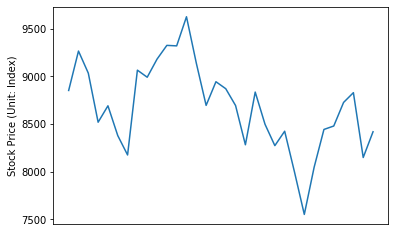

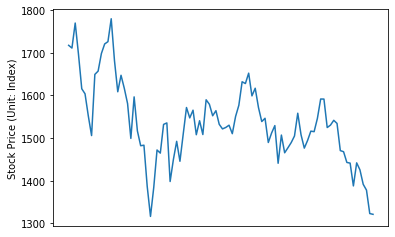

In [8]:
def test_plot_prices():
    """ Test plot_prices """
    
    plot_prices(DJIA_34)
    plot_prices(NASDAQ_100)

test_plot_prices()

In [9]:
###########################################################
# Part 2 - Convert ISO data format to days and make better plots

def isodate_to_day(isodate):
    """
    Input: A string date in ISO date format

    Output: Float corrspending to mumber of days used in
    matplotlib's plt.plot_date()
    """
    datetime_formate_date = datetime.datetime.strptime(isodate, "%Y-%m-%d")
    plt_format_date = mdates.date2num(datetime_formate_date)
    
    return plt_format_date

In [11]:
###########################################################
# Student code for more plots in matplotlib (peer-graded)

def plot_dates_prices(index_file):
    """
    Input: Strings index_file for CSV file with stock index data
    
    Output: matplotlib figure generated by reading the CSV file
    index_file and plotting the dates/prices using isodate_to_day()
    """
    #process data 
    raw_series_output = read_series(index_file)
    clean_series_output = clean_series(raw_series_output)
    
    #get x and y
    plt_date_data = []
    index_prices_data = []
    for date, price in clean_series_output:
        plt_date_data.append(isodate_to_day(date))
        index_prices_data.append(price)
    
    fig, axs = plt.subplots()  
    axs.plot(plt_date_data, index_prices_data)
    axs.set_title('Date vs. Price Plot for ' + index_file[5:], fontsize=18)
    axs.set_ylabel('Stock Price (Unit: Index)', fontsize=15)
    axs.set_xlabel('Date', fontsize=15)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))#label with iso date form
    plt.gcf().autofmt_xdate() #xlabel rotation
    
    return fig

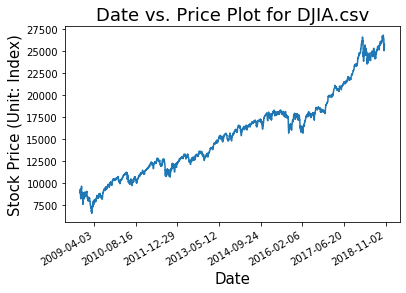

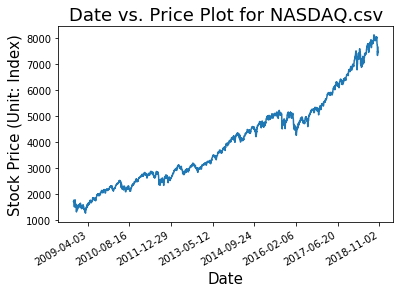

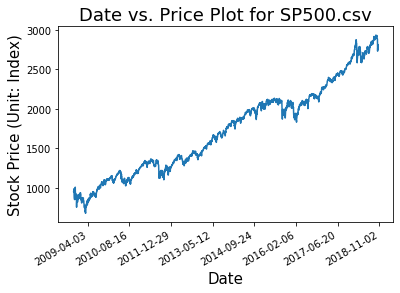

In [12]:
def test_plot_dates_prices():
    """ Test plot_dates_prices"""

    plot_dates_prices(DJIA)
    plot_dates_prices(NASDAQ)
    plot_dates_prices(SP500)
    
test_plot_dates_prices()   

In [33]:
def plot_two_indices(index_file1, index_file2):
    """
    Input: Strings index_file1 and index_file2
    with CSV data for pair of stock indices
    
    Output: matplotlib figure generated by plotting a comparison
    of the price of two indices in the style of 
    https://matplotlib.org/gallery/api/two_scales.html
    """
    #process data 
    index_file1_output = clean_series(read_series(index_file1))
    index_file2_output = clean_series(read_series(index_file2))
    
    #get x and y
    plt_date_data1 = []
    index_prices_data1 = []
    for date, price in index_file1_output:
        plt_date_data1.append(isodate_to_day(date))
        index_prices_data1.append(price)
        
    plt_date_data2 = []
    index_prices_data2 = []
    for date, price in index_file2_output:
        plt_date_data2.append(isodate_to_day(date))
        index_prices_data2.append(price)
        
    #make the plot
    fig, ax1 = plt.subplots()
    
    #the first 
    color = 'tab:red'
    ax1.plot(plt_date_data1, index_prices_data1, color=color)
    ax1.set_ylabel('Index for ' + index_file1[5:-4], color=color, fontsize=15)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel('Date', fontsize=15)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    ax1.set_title('Two Indices Plot', fontsize=18)
    
    #the second
    ax2 = ax1.twinx()
    
    color = 'tab:blue'
    ax2.plot(plt_date_data2, index_prices_data2, color=color)
    ax2.set_ylabel('Index for ' + index_file2[5:-4], color=color, fontsize=15)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    
    return fig

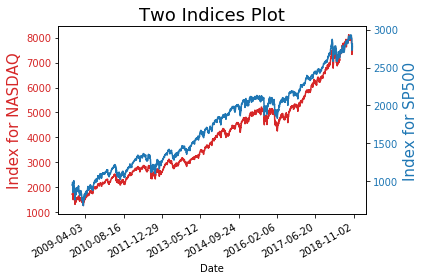

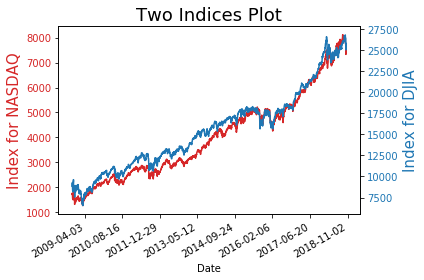

In [34]:
def test_plot_two_indices():
    """ Test plot_two_indices """
    
    plot_two_indices(NASDAQ, SP500)
    plot_two_indices(NASDAQ, DJIA)
    
test_plot_two_indices()